In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

In [3]:
!pip install seaborn

In [4]:
!pip install numpy

Correlation between wind speed and step counts: -0.0753175104696579


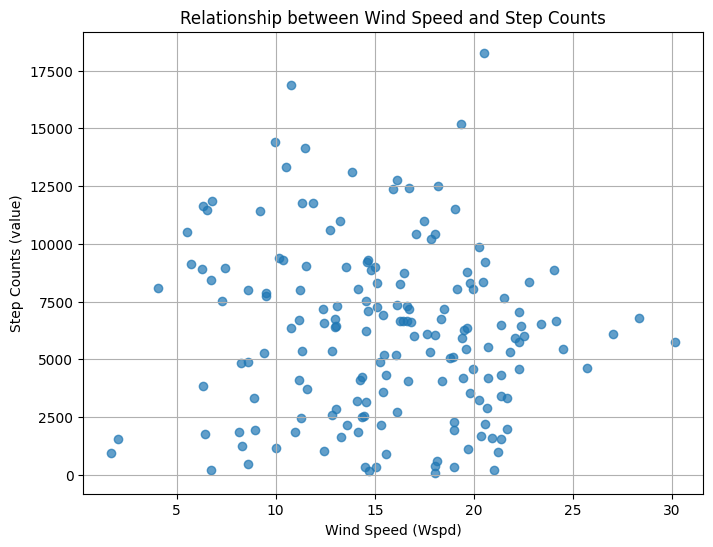

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
data = pd.read_csv('sabanciwdata_converted.csv')  # Wind speed data
data1 = pd.read_csv('stepcountck.csv')  # Step count data

# Convert time columns to datetime and remove timezones (make them timezone-naive)
data['Time'] = pd.to_datetime(data['Time']).dt.tz_localize(None)
data1['startDate'] = pd.to_datetime(data1['startDate']).dt.tz_localize(None)

# Resample wind speed data to daily averages
data_daily = data.resample('D', on='Time').mean()

# Resample step count data to daily totals
data1_daily = data1.resample('D', on='startDate').sum()

# Merge datasets on the date
merged_data = pd.merge(data_daily, data1_daily, left_index=True, right_index=True)

# Define relevant columns
wind_speed_column = 'Wspd'  # Wind speed column
step_count_column = 'value'  # Step count column

# Compute correlation
correlation = merged_data[wind_speed_column].corr(merged_data[step_count_column])
print(f"Correlation between wind speed and step counts: {correlation}")

# Plot the relationship
plt.figure(figsize=(8, 6))
plt.scatter(merged_data[wind_speed_column], merged_data[step_count_column], alpha=0.7)
plt.title('Relationship between Wind Speed and Step Counts')
plt.xlabel('Wind Speed (Wspd)')
plt.ylabel('Step Counts (value)')
plt.grid(True)
plt.show()


Correlation between wind speed and step counts: -0.0753175104696579


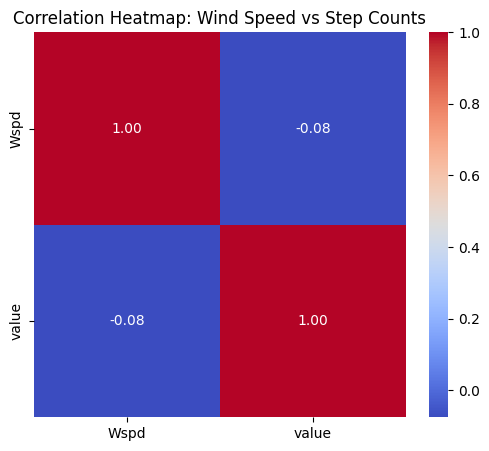

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # For heatmap

# Load the datasets
data = pd.read_csv('sabanciwdata_converted.csv')  # Wind speed data
data1 = pd.read_csv('stepcountck.csv')  # Step count data

# Convert time columns to datetime and remove timezones (make them timezone-naive)
data['Time'] = pd.to_datetime(data['Time']).dt.tz_localize(None)
data1['startDate'] = pd.to_datetime(data1['startDate']).dt.tz_localize(None)

# Resample wind speed data to daily averages
data_daily = data.resample('D', on='Time').mean()

# Resample step count data to daily totals
data1_daily = data1.resample('D', on='startDate').sum()

# Merge datasets on the date
merged_data = pd.merge(data_daily, data1_daily, left_index=True, right_index=True)

# Define relevant columns
wind_speed_column = 'Wspd'  # Wind speed column
step_count_column = 'value'  # Step count column

# Compute correlation
correlation = merged_data[wind_speed_column].corr(merged_data[step_count_column])
print(f"Correlation between wind speed and step counts: {correlation}")

### 1. Correlation Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(merged_data[[wind_speed_column, step_count_column]].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Wind Speed vs Step Counts')
plt.show()






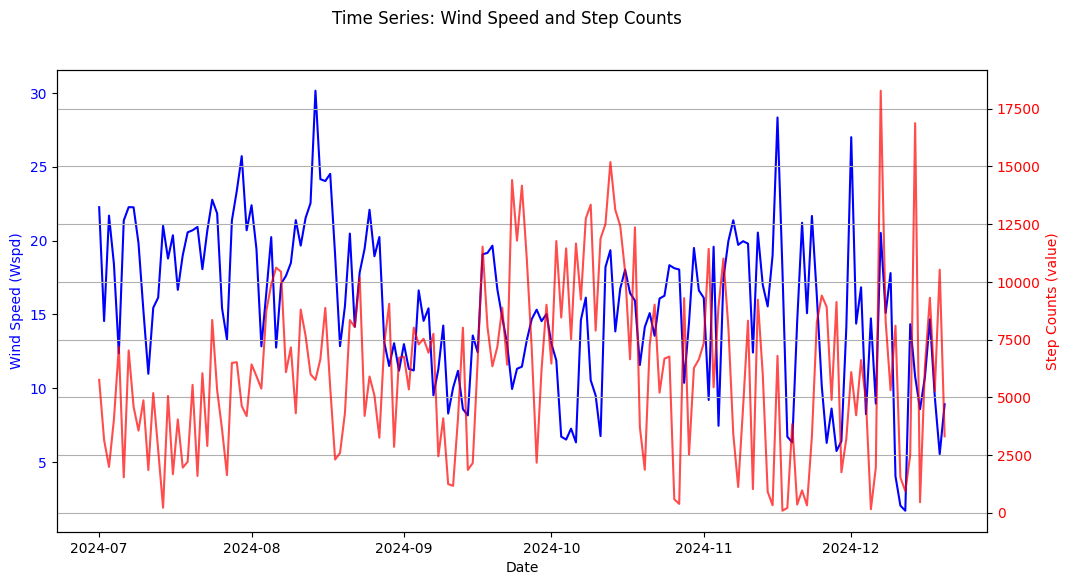

In [10]:
# Time series plot: Wind speed and step counts
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot wind speed on the primary axis
ax1.plot(merged_data.index, merged_data[wind_speed_column], label='Wind Speed (Wspd)', color='blue')
ax1.set_xlabel("Date")
ax1.set_ylabel("Wind Speed (Wspd)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot step counts on the secondary axis
ax2 = ax1.twinx()
ax2.plot(merged_data.index, merged_data[step_count_column], label='Step Counts', color='red', alpha=0.7)
ax2.set_ylabel("Step Counts (value)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add a title and show the plot
fig.suptitle("Time Series: Wind Speed and Step Counts")
plt.grid(True)
plt.show()



In [12]:
!pip install scipy

Correlation between daily average wind speed and daily total step counts: -0.08


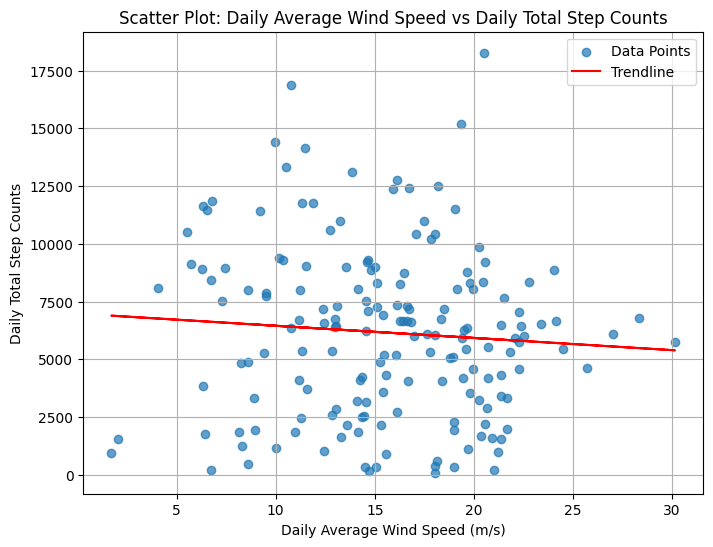

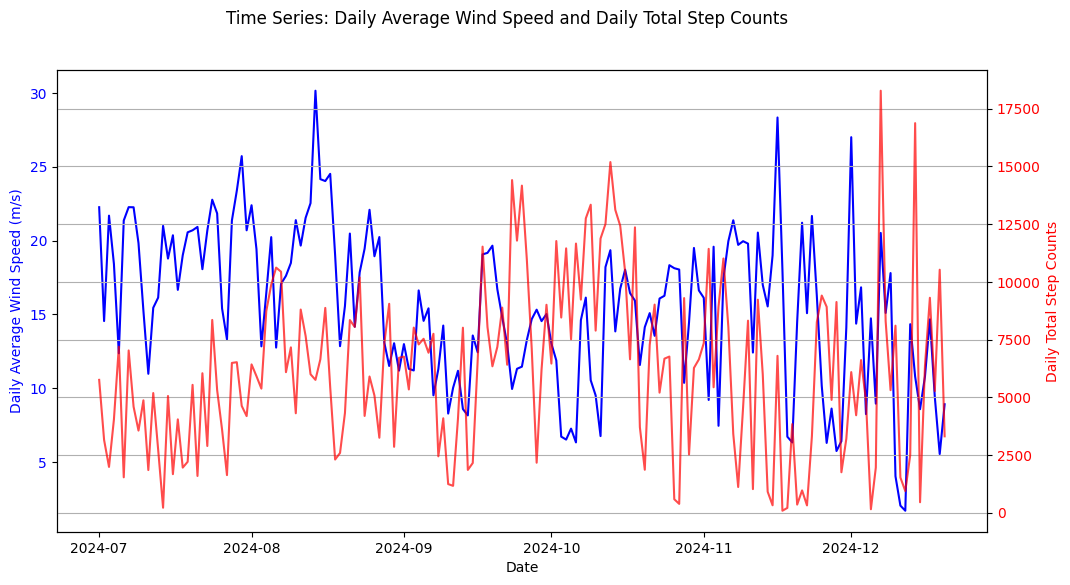

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Load the datasets
data = pd.read_csv('sabanciwdata_converted.csv')  # Wind speed data
data1 = pd.read_csv('stepcountck.csv')  # Step count data

# Step 1: Convert timestamps to datetime format
data['Time'] = pd.to_datetime(data['Time'], format='%m/%d/%Y %H:%M')
data1['startDate'] = pd.to_datetime(data1['startDate'], errors='coerce')

# Step 2: Group step count data by day and wind speed data by day
data['Date'] = data['Time'].dt.date  # Extract date
data1['Date'] = data1['startDate'].dt.date  # Extract date

# Aggregate wind speed to daily averages
wind_daily = data.groupby('Date').agg(DailyWindSpeed=('Wspd', 'mean')).reset_index()

# Aggregate step counts to daily totals
steps_daily = data1.groupby('Date').agg(DailyStepCount=('value', 'sum')).reset_index()

# Step 3: Merge the two datasets on the date
merged_data = pd.merge(wind_daily, steps_daily, on='Date', how='inner')

# Step 4: Calculate the correlation
correlation = merged_data['DailyWindSpeed'].corr(merged_data['DailyStepCount'])
print(f"Correlation between daily average wind speed and daily total step counts: {correlation:.2f}")

# Step 5: Visualizations

# 5.1 Scatter plot: Daily Average Wind Speed vs Daily Total Step Counts
plt.figure(figsize=(8, 6))
plt.scatter(merged_data['DailyWindSpeed'], merged_data['DailyStepCount'], alpha=0.7, label='Data Points')
plt.title("Scatter Plot: Daily Average Wind Speed vs Daily Total Step Counts")
plt.xlabel("Daily Average Wind Speed (m/s)")
plt.ylabel("Daily Total Step Counts")
plt.grid(True)

# Add a trendline
slope, intercept, r_value, p_value, std_err = linregress(merged_data['DailyWindSpeed'], merged_data['DailyStepCount'])
trendline = slope * merged_data['DailyWindSpeed'] + intercept
plt.plot(merged_data['DailyWindSpeed'], trendline, color='red', label='Trendline')

# Show legend and plot
plt.legend()
plt.show()

# 5.2 Time series plot: Daily Average Wind Speed and Daily Total Step Counts
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot wind speed on the primary axis
ax1.plot(merged_data['Date'], merged_data['DailyWindSpeed'], label='Daily Average Wind Speed (m/s)', color='blue')
ax1.set_xlabel("Date")
ax1.set_ylabel("Daily Average Wind Speed (m/s)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot step counts on the secondary axis
ax2 = ax1.twinx()
ax2.plot(merged_data['Date'], merged_data['DailyStepCount'], label='Daily Total Step Counts', color='red', alpha=0.7)
ax2.set_ylabel("Daily Total Step Counts", color='red')
ax2.tick_params(axis='y', labelcolor='red')

fig.suptitle("Time Series: Daily Average Wind Speed and Daily Total Step Counts")
plt.grid(True)
plt.show()


Correlation between daily average temperature and daily total step counts: -0.02


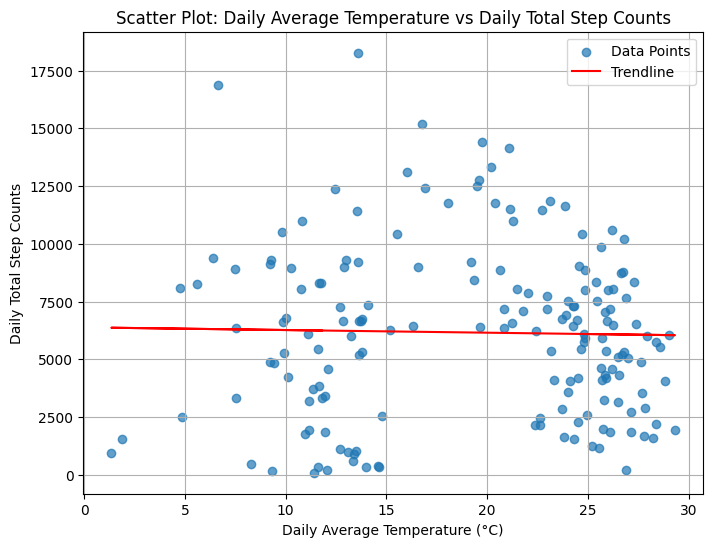

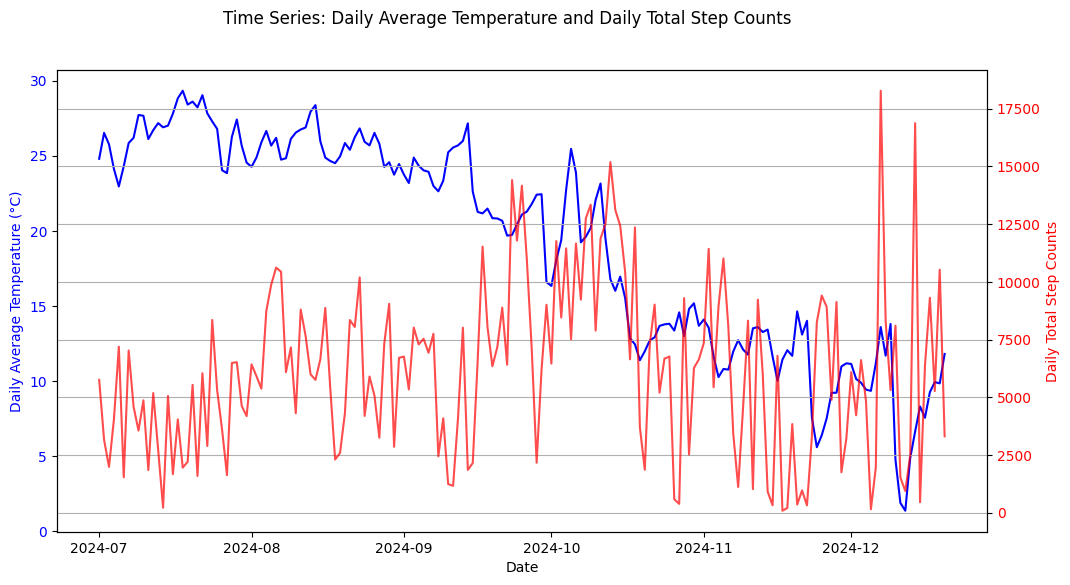

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Load the datasets
data = pd.read_csv('sabanciwdata_converted.csv')  # Temperature data
data1 = pd.read_csv('stepcountck.csv')  # Step count data

# Step 1: Convert timestamps to datetime format
data['Time'] = pd.to_datetime(data['Time'], format='%m/%d/%Y %H:%M')
data1['startDate'] = pd.to_datetime(data1['startDate'], errors='coerce')

# Step 2: Group step count data by day and temperature data by day
data['Date'] = data['Time'].dt.date  # Extract date
data1['Date'] = data1['startDate'].dt.date  # Extract date

# Aggregate temperature to daily averages
temp_daily = data.groupby('Date').agg(DailyTemp=('Temp', 'mean')).reset_index()

# Aggregate step counts to daily totals
steps_daily = data1.groupby('Date').agg(DailyStepCount=('value', 'sum')).reset_index()

# Step 3: Merge the two datasets on the date
merged_data = pd.merge(temp_daily, steps_daily, on='Date', how='inner')

# Step 4: Calculate the correlation
correlation = merged_data['DailyTemp'].corr(merged_data['DailyStepCount'])
print(f"Correlation between daily average temperature and daily total step counts: {correlation:.2f}")

# Step 5: Visualizations

# 5.1 Scatter plot: Daily Average Temperature vs Daily Total Step Counts
plt.figure(figsize=(8, 6))
plt.scatter(merged_data['DailyTemp'], merged_data['DailyStepCount'], alpha=0.7, label='Data Points')
plt.title("Scatter Plot: Daily Average Temperature vs Daily Total Step Counts")
plt.xlabel("Daily Average Temperature (°C)")
plt.ylabel("Daily Total Step Counts")
plt.grid(True)

# Add a trendline
slope, intercept, r_value, p_value, std_err = linregress(merged_data['DailyTemp'], merged_data['DailyStepCount'])
trendline = slope * merged_data['DailyTemp'] + intercept
plt.plot(merged_data['DailyTemp'], trendline, color='red', label='Trendline')

# Show legend and plot
plt.legend()
plt.show()

# 5.2 Time series plot: Daily Average Temperature and Daily Total Step Counts
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot temperature on the primary axis
ax1.plot(merged_data['Date'], merged_data['DailyTemp'], label='Daily Average Temperature (°C)', color='blue')
ax1.set_xlabel("Date")
ax1.set_ylabel("Daily Average Temperature (°C)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot step counts on the secondary axis
ax2 = ax1.twinx()
ax2.plot(merged_data['Date'], merged_data['DailyStepCount'], label='Daily Total Step Counts', color='red', alpha=0.7)
ax2.set_ylabel("Daily Total Step Counts", color='red')
ax2.tick_params(axis='y', labelcolor='red')

fig.suptitle("Time Series: Daily Average Temperature and Daily Total Step Counts")
plt.grid(True)
plt.show()


Correlation matrix:
                DailyTemp  DailyStepCount
DailyTemp        1.000000       -0.022167
DailyStepCount  -0.022167        1.000000


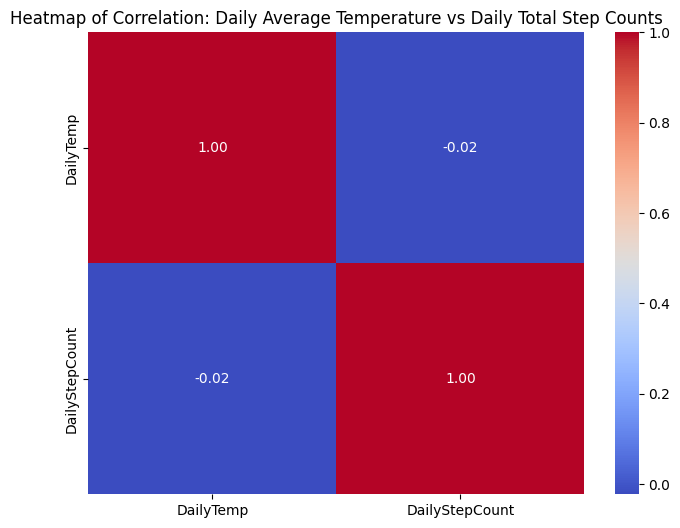

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
data = pd.read_csv('sabanciwdata_converted.csv')  # Temperature data
data1 = pd.read_csv('stepcountck.csv')  # Step count data

# Step 1: Convert timestamps to datetime format
data['Time'] = pd.to_datetime(data['Time'], format='%m/%d/%Y %H:%M')
data1['startDate'] = pd.to_datetime(data1['startDate'], errors='coerce')

# Step 2: Group data by day
data['Date'] = data['Time'].dt.date  # Extract date
data1['Date'] = data1['startDate'].dt.date  # Extract date

# Aggregate temperature data to daily averages
temp_daily = data.groupby('Date').agg(DailyTemp=('Temp', 'mean')).reset_index()

# Aggregate step count data to daily totals
steps_daily = data1.groupby('Date').agg(DailyStepCount=('value', 'sum')).reset_index()

# Step 3: Merge datasets on the date
merged_data = pd.merge(temp_daily, steps_daily, on='Date', how='inner')

# Step 4: Calculate correlation
correlation = merged_data[['DailyTemp', 'DailyStepCount']].corr()
print(f"Correlation matrix:\n{correlation}")

# Step 5: Create and visualize the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Heatmap of Correlation: Daily Average Temperature vs Daily Total Step Counts")
plt.show()
